### Import TensorFlow

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### Download and prepare the CIFAR10 dataset


The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

### Verify the data

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image.


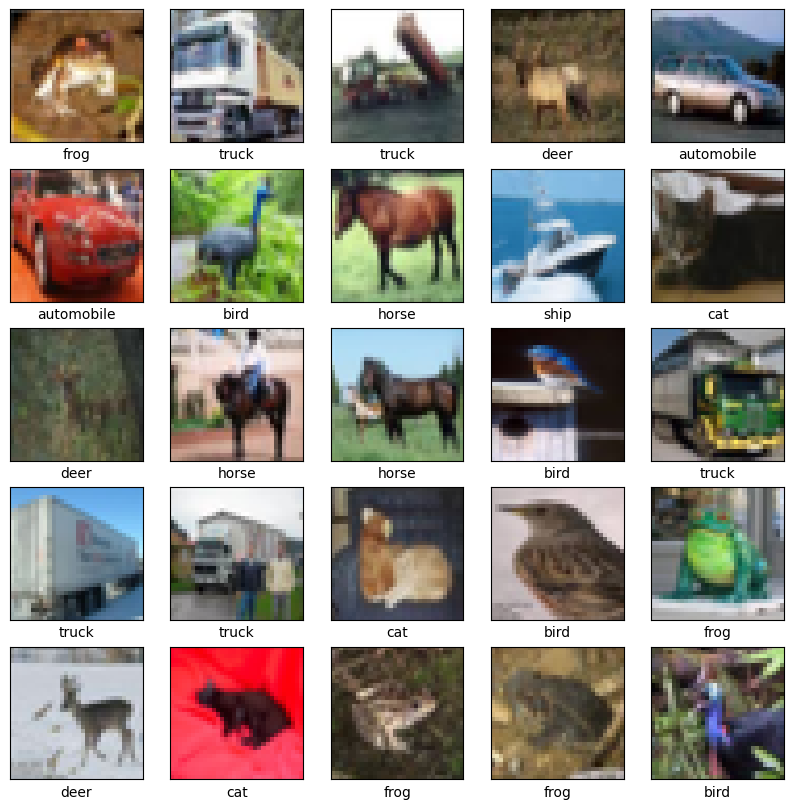

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Create the model (your code goes here)

In [4]:
#reshape inputs for CNN layers
train_images = train_images.reshape(train_images.shape[0], 32, 32, 3)
test_images = test_images.reshape(test_images.shape[0], 32, 32, 3)

In [5]:
# CNN MODEL
#  - Notes - 
# Total Filters (Features) = 112
# Increased stride resolution
# Added an additional conv2d layer
# Regularization Techniques Used:
#   1) Batch Normalization (scale = False due to relu)
#   2) Dropout (decreased to 20% due to batch normalization)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(kernel_size = 3, filters = 16, use_bias = False, padding = 'same', input_shape = (32, 32, 3)),
    tf.keras.layers.BatchNormalization(center = True, scale = False),
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Conv2D(kernel_size = 6, filters = 32, use_bias = False, padding = 'same', strides = 1),
    tf.keras.layers.BatchNormalization(center = True, scale = False),
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Conv2D(kernel_size = 6, filters = 64, use_bias = False, padding = 'same', strides = 1),
    tf.keras.layers.BatchNormalization(center = True, scale = False),
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Conv2D(kernel_size = 6, filters = 128, use_bias = False, padding = 'same', strides = 1),
    tf.keras.layers.BatchNormalization(center = True, scale = False),
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(200, use_bias = False),
    tf.keras.layers.BatchNormalization(center = True, scale = False),
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dropout(0.20),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

### Compile and train the model

In [6]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=15, 
                    validation_data=(test_images, test_labels))

Epoch 1/15


c:\Users\ptpsm\anaconda3\envs\tf\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 [==============================] - 28s 16ms/step - loss: 1.2150 - accuracy: 0.5701 - val_loss: 1.1090 - val_accuracy: 0.6226
Epoch 2/15
1563/1563 [==============================] - 24s 16ms/step - loss: 0.8122 - accuracy: 0.7173 - val_loss: 0.9888 - val_accuracy: 0.6579
Epoch 3/15
1563/1563 [==============================] - 24s 16ms/step - loss: 0.6596 - accuracy: 0.7712 - val_loss: 0.7215 - val_accuracy: 0.7482
Epoch 4/15
1563/1563 [==============================] - 25s 16ms/step - loss: 0.5262 - accuracy: 0.8166 - val_loss: 0.9908 - val_accuracy: 0.6864
Epoch 5/15
1563/1563 [==============================] - 25s 16ms/step - loss: 0.4103 - accuracy: 0.8581 - val_loss: 0.7530 - val_accuracy: 0.7608
Epoch 6/15
1563/1563 [==============================] - 24s 16ms/step - loss: 0.2919 - accuracy: 0.8999 - val_loss: 0.7735 - val_accuracy: 0.7688
Epoch 7/15
1563/1563 [==============================] - 24s 16ms/step - loss: 0.2026 - accuracy: 0.9315 - val_loss: 0.6874 - val_accura

### Evaluate the model

In [7]:
# INITIAL MODEL VALIDATION
# plt.plot(history.history['accuracy'], label='accuracy')
# plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.ylim([0.5, 1])
# plt.legend(loc='lower right')

# test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 7s - loss: 0.9236 - accuracy: 0.7861 - 7s/epoch - 24ms/step


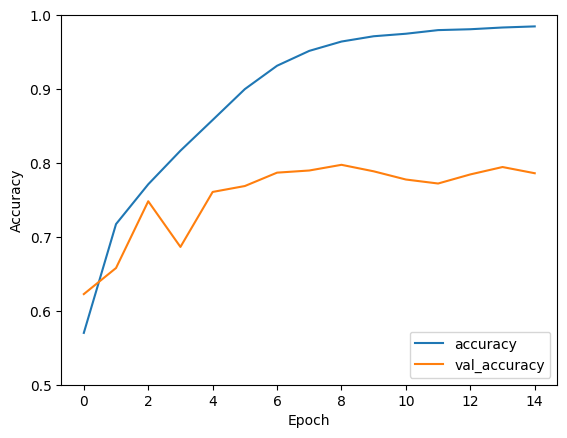

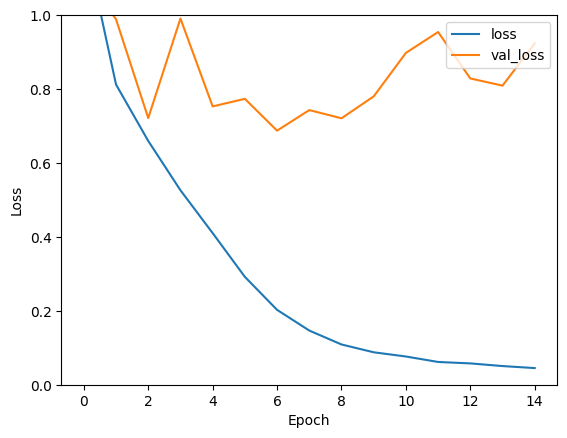

In [8]:
plt.figure()
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Included loss to measure overfitting
plt.figure()
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='upper right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [9]:
print(test_acc)

0.7860999703407288
